El presente notebook tiene como fin ejecutar los codigos de muestra de la libreria "tslearn".


## Ejemplo 1

Euclidean k-means


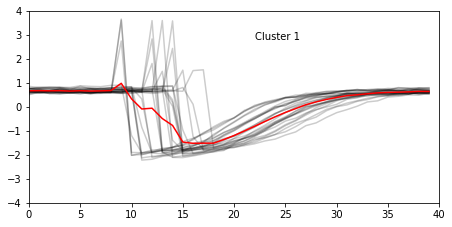

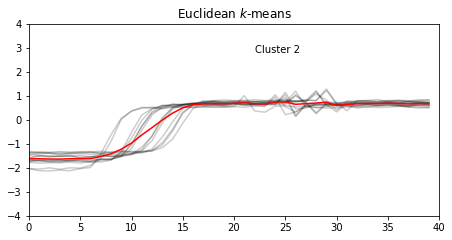

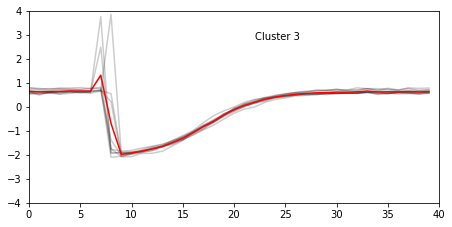

DBA k-means


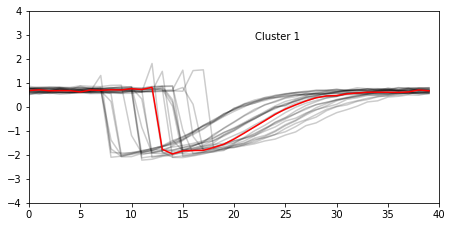

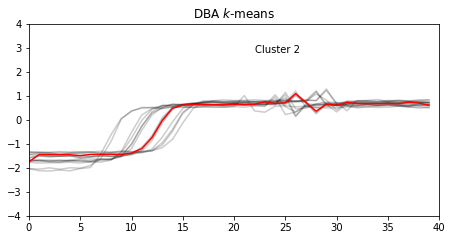

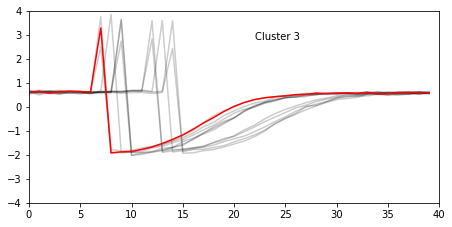

Soft-DTW k-means


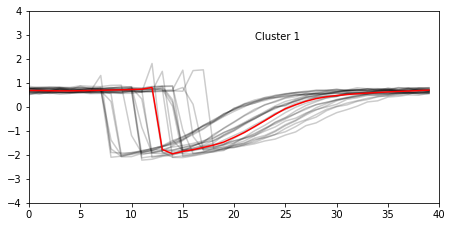

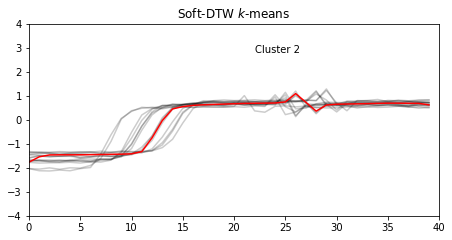

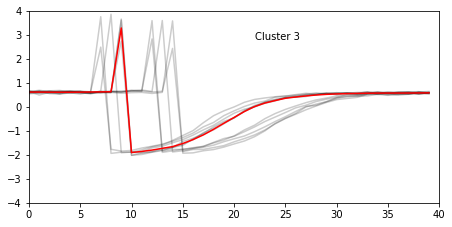

In [6]:
# Ejemplo de uso de TSLEARN

import numpy
import matplotlib.pyplot as plt
import random

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

fsize=(25,12)
seed = 0
numpy.random.seed(seed)

# Cargar datos y dividirlos segun train-test
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# Solo escoger 3 clases
X_train = X_train[y_train < 4]

# Hacer un shuffle a la data
numpy.random.shuffle(X_train)

# Seleccionar solo 50 muestras
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Hacer que cada señal tenga solo 40 de tamaño (40 puntos)
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, random_state=seed)
y_pred = km.fit_predict(X_train)

# Recorrer los 3 grupos
for yi in range(3):
    plt.figure(figsize=fsize)
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
    plt.show()

    
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

# Recorrer los 3 grupos
for yi in range(3):
    plt.figure(figsize=fsize)
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
    plt.show()

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

# Recorrer los 3 grupos
for yi in range(3):
    plt.figure(figsize=fsize)
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")
    plt.show()

#plt.tight_layout()
#plt.show()

# fin

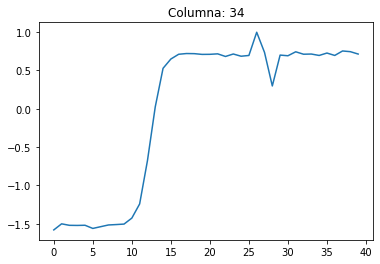

In [25]:
# ver alguna muestra de forma aleatoria ... ver la señal

ii = random.randint(0,X_train.shape[0])
plt.plot(X_train[ii,:])
titulo = 'Columna: '+ str(ii)
plt.title(titulo)
plt.show()

# fin

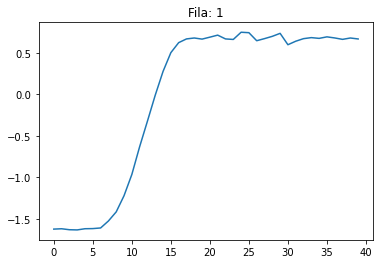

In [47]:
# ver alguna muestra de forma aleatoria ... ver la señal

jj = random.randint(0,pp.shape[1])
plt.plot(pp[:,jj])
titulo = 'Columna: '+ str(jj)
plt.title(titulo)
plt.show()

# fin

In [56]:
# Hacer la prediccion con el modelo ya entrenado segun Kmeans-time

y=km.predict(X_train)
y

array([0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 1, 0], dtype=int64)

In [57]:
# Ver las etiquetas de clasificacion obtenidas segun Kmeans-time

km.labels_

array([0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 1, 0], dtype=int64)

In [62]:
# Hacer la transformacion de los X segun el modelo Kmeans-time

ty=km.transform(X_train)
ty

array([[ 4.32117671, 10.46136168,  8.3893886 ],
       [ 6.14902246,  8.4545842 ,  1.31095705],
       [ 9.71747173,  1.27576417,  7.92664475],
       [ 2.34653221, 10.59492002,  7.39590566],
       [ 9.71368924,  2.92898459,  9.96498543],
       [ 2.51864962, 10.66578976,  7.107718  ],
       [ 4.78458093, 10.68279468,  8.62154011],
       [ 2.80882791,  9.51746593,  5.07006333],
       [ 2.46574234, 10.25108621,  7.43230102],
       [ 9.42993833,  1.93624745,  7.30624415],
       [ 9.89090281,  1.24782161,  8.88280303],
       [ 9.74990261,  1.08472061,  8.09989373],
       [ 4.13677167,  9.72059376,  4.45613046],
       [ 3.39986648, 10.02676794,  4.81127639],
       [ 6.12156685,  8.11969507,  1.23674639],
       [ 9.8881035 ,  1.62977908,  9.24434329],
       [ 4.44803653, 10.76342294,  8.29428259],
       [ 3.27981515, 10.10793366,  5.39679428],
       [ 6.06736693,  8.61251398,  1.63482617],
       [ 9.83949031,  1.16272272,  8.74320841],
       [ 2.85007886, 10.08498247,  6.541

## Ejemplo 2

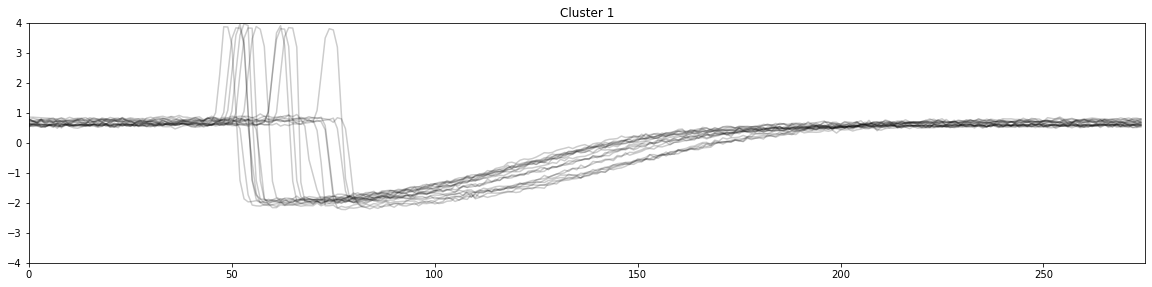

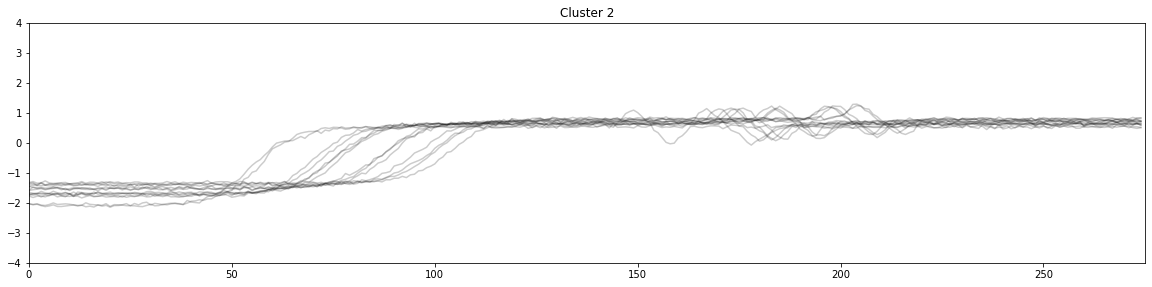

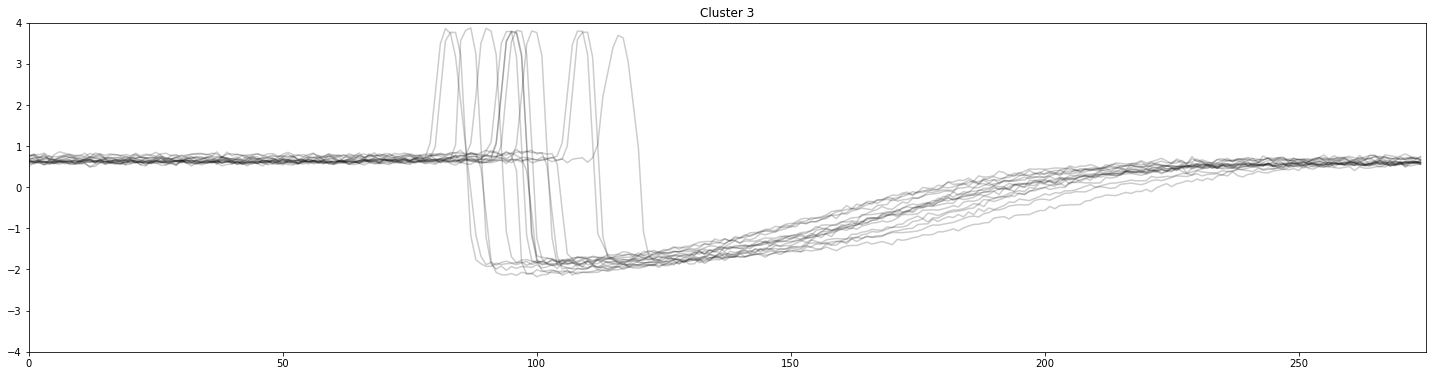

In [74]:
# Ejemplo de tutorial del uso de tslearn

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KernelKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

fsize=(20,15)
seed = 0
numpy.random.seed(seed)

# Cargar datos y dividirlos segun train-test
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# Solo usar 3 clases o categorias
X_train = X_train[y_train < 4]
numpy.random.shuffle(X_train)

# Solo usar 50 muestras
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
sz = X_train.shape[1]

# Modelo Kmeans
gak_km = KernelKMeans(n_clusters=3,
                      kernel="gak",
                      kernel_params={"sigma": "auto"},
                      n_init=20,
                      random_state=seed)
y_pred = gak_km.fit_predict(X_train)

# Recorrer los 3 grupos
for yi in range(3):
    plt.figure(figsize=fsize)
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()